# Statistical Tests

## Overview:

This notebook contains T-tests and proportion tests on the meteorite and popualation datasets (stored in ./CSV_MASTERS). Contained within, we ask and answer questions using statistical tests about meteorite masses, strike dispursion, and observations by people in various time periods and countries.

***
## Data:

#### [NASA Meteorite Dataset](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh)

##### Supplemental data about countries and landmass pulled from:

* #### http://worldpopulationreview.com/countries/countries-by-density/
* #### https://photius.com/rankings/world2050_rank.html 
***

***
## Index:

### [Mass & Classification](http://localhost:8888/notebooks/TESTING.ipynb#T-test-comparsion-of-masses-of-the-meteor-classifications)
### [Dispersion Over landmass](#)
### [Proportion of Observed Falling Meteorites to Meteorites Found on the Ground ](#)

***



## Imports

In [ ]:
import pandas as pd
import statsmodels.api as sm

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

***
## T-test comparsion of masses of the meteor classifications

### Question: Do the different classifications have different distributions of mass (in grams)?

* #### Ho: The distributions of masses are no different between classifications

* #### Ha: The distributions of masses are different between classifications

### Methodology:

We begin by subsetting our dataset into the four main classifications - _Chondrite, Achondrite, Iron, and Stony-Iron_.  

From there, we run a t-test on the samples of masses of each classification between each pair of classifications. We display the data in a chart indicating at which alpha levels we can claim statistical significance.  

_The function below is commented to explain the code for this test._

In [ ]:
def test_classification_masses(df, classification_names=("Chondrite", "Achondrite", "Iron", "Stony-Iron")):
    """
    Accepts the names of the classifications (or a subset of classifications)
    
    For each classification, runs a t test against all others to determine if their masses are from the same population
    
    Returns a dataframe with the results. 
    (For the aplha columns, True and False refers to the rejection of the null hypothesis) 
    """
    
    
    classification_mass = []
    # append a list of masses to the classification_mass list for each name
    for name in classification_names:
        classification_mass.append(df[df.major_classification == name].mass)
    
    test_results = [] # where we will be appending all our results
    alpha_list = (0.1, 0.05, 0.01) # the different alpha levels to test
    for i in range(len(classification_mass)):
        for j in range(i + 1, len(classification_mass)):
            samp1, samp2 = (classification_names[i],classification_names[j]) 
            # test each classification against the others. 
            t_stat, p_value = ttest_ind(classification_mass[i], classification_mass[j], equal_var=False)
            # given the p values, check against list of alphas
            alpha_1, alpha_05, alpha_01 = (p_value < alpha_list[0],p_value < alpha_list[1], p_value < alpha_list[2])
            #  append everything to the rest results as a tuple
            test_results.append((samp1, samp2, t_stat, p_value, alpha_1, alpha_05, alpha_01))
    # create and return a dataframe of the results        
    return pd.DataFrame(test_results, columns=("sample_1", "sample_2", "t_stat", "p_value", "alpha 10%", "alpha 5%", "alpha 1%"))

In [ ]:
df = pd.read_csv("CSV_MASTERS/Final.csv")

In [ ]:
# test_classification_masses(df).to_csv("tables/classification_test.csv", index=False)
test_classification_masses(df)

### Analysis: 

In the alpha columns of the chart above, we can read those as **whether or not we we able to reject our null hypothesis**.   

Overall, it appears that mass distributions are different for the various classifications. However, the exception is that Chondrite and Achondrite classifications do not have statistically different mass distributions. [Based on the composition of Chondrite and Achondrite](https://en.wikipedia.org/wiki/Meteorite_classification) meteorites vs the composition of Iron and Stony-Iron, these classifications make sense, as Iron meteortites are made of denser, heavier material.  

***
## Strikes Per Global Quadrant

### Question: Do meteorites fall with equal distribution across all landmasses of the plant?

* #### Ho: Meteorites fall with equal frequency over the landmasses of the globe.  

* #### Ha: Meteorites do not fall with equal frequency over the landmasses of the globe. 

### Methodology:

We test the dispersion of meteorites over the landmasses in two different ways.  

We start broadly and look at hemispheres and quadrants of the earth to see if if any of them have a statistically higher number of meteorite strikes.  

The above method does not account for the proportion of landmass to oceans. Our second methodology does this by comparing various regions (e.g. Asia, Latin America, North America, etc.). Using this methodology, we can get a much more precise picture of strikes over landmass.

## Strikes per hemisphere

In [14]:
def test_hemisphere(df):
    north = df[df.reclat > 0].mass
    south = df[df.reclat < 0].mass
    
    t_stat, p_value = ttest_ind(north, south, equal_var=False)
    alpha_list = (0.1, 0.05, 0.01) # the different alpha levels to test
    
    alpha_1, alpha_05, alpha_01 = (p_value < alpha_list[0],p_value < alpha_list[1], p_value < alpha_list[2])

    return pd.DataFrame([(t_stat, p_value, alpha_1, alpha_05, alpha_01)], columns=["t_stat", "p_value", "alpha 10%", "alpha 5%", "alpha 1%"])
    
test_hemisphere(df)

,t_stat,p_value,alpha 10%,alpha 5%,alpha 1%
0,2.923305,0.00347,True,True,True


In [15]:
def test_quadrants(df):
    # Subset the various quadrants
    ne = df[(df.reclat >= 0) & (df.reclong >= 0)].mass
    nw = df[(df.reclat >= 0) & (df.reclong <= 0)].mass
    sw = df[(df.reclat <= 0) & (df.reclong <= 0)].mass
    se = df[(df.reclat <= 0) & (df.reclong >= 0)].mass 
    
    quadrant_data = (ne, nw, sw, se)
    quadrant_names = ("NE", "NW", "SW", "SE")
    
    test_results = [] # where we will be appending all our results
    alpha_list = (0.1, 0.05, 0.01) # the different alpha levels to test
    
    for i in range(4):
        for j in range(i + 1, 4):
            # Run the test for each quadrant comparing it to each other quadrant. 
            samp1, samp2 = quadrant_names[i], quadrant_names[j]
            t_stat, p_value = ttest_ind(quadrant_data[i], quadrant_data[j], equal_var=False)
            alpha_1, alpha_05, alpha_01 = (p_value < alpha_list[0],p_value < alpha_list[1], p_value < alpha_list[2])
            
            test_results.append((samp1, samp2, t_stat, p_value, alpha_1, alpha_05, alpha_01))
    
    return pd.DataFrame(test_results, columns=["quadrant_1", "quadrant_2", "t_stat", "p_value", "alpha 10%", "alpha 5%", "alpha 1%"])
            

In [16]:
# test_quadrants(df).to_csv("tables/landmass.csv", index=False)
test_quadrants(df)

,quadrant_1,quadrant_2,t_stat,p_value,alpha 10%,alpha 5%,alpha 1%
0,NE,NW,-2.541272,0.011108,True,True,False
1,NE,SW,-0.919997,0.357687,False,False,False
2,NE,SE,1.629069,0.103324,False,False,False
3,NW,SW,1.378149,0.168233,False,False,False
4,NW,SE,2.870973,0.004130,True,True,True
5,SW,SE,1.300079,0.193734,False,False,False


### Analysis:

Again, the above results can be read as whether or not we were able to reject the null hypothisis. In most cases, we found that the number of strikes in a particular hemisphere or quadrant was not significantly different from other. Of note, the NW quadrant vs the SE quadrant does appear to be statistically significant. However, as stated above, this does not account for landmass in those regions. The SE region has less landmass, and therefore we would expect fewer reports of meteorites in this area.    

The region analysis below accounts for this landmass issue

## Strikes By Region

In [17]:
earth_strikes = pd.read_csv("CSV_MASTERS/GeoEarth_with_num_strikes")
earth_strikes.loc[121, "subregion"] = "Antarctica"
earth_strikes.loc[121, "region_wb"] = "Antarctica"

In [18]:
region = list(earth_strikes.region_wb.unique())

samples = []

for r in region:
    samples.append(earth_strikes[earth_strikes.region_wb == r].num_strikes)


    
test_results = []
alpha_list = (0.1, 0.05, 0.01) # the different alpha levels to test
for i in range(len(samples)):
    for j in range(i + 1, len(samples)):
        samp1, samp2 = samples[i], samples[j]
        t_stat, p_value = ttest_ind(samp1, samp2, equal_var=False)
        alpha_1, alpha_05, alpha_01 = (p_value < alpha_list[0],p_value < alpha_list[1], p_value < alpha_list[2])
        
        test_results.append((region[i], region[j], t_stat, p_value, alpha_1, alpha_05, alpha_01))
        
region_strikes = pd.DataFrame(test_results, columns=["Region 1", "Region 2", "t-stat", "p-value", "alpha 10%", "alpha 5%", "alpha 1%"])

region_strikes.dropna(inplace=True)

In [19]:
# region_strikes.to_csv("tables/strikes_per_region.csv", index=False)
region_strikes

,Region 1,Region 2,t-stat,p-value,alpha 10%,alpha 5%,alpha 1%
0,Latin America & Caribbean,North America,-0.886507,0.534286,False,False,False
1,Latin America & Caribbean,Europe & Central Asia,1.238742,0.234426,False,False,False
2,Latin America & Caribbean,Middle East & North Africa,-0.960486,0.347235,False,False,False
3,Latin America & Caribbean,South Asia,1.056172,0.306036,False,False,False
4,Latin America & Caribbean,East Asia & Pacific,0.791141,0.438777,False,False,False
5,Latin America & Caribbean,Sub-Saharan Africa,1.220304,0.240944,False,False,False
8,North America,Europe & Central Asia,1.055162,0.482911,False,False,False
9,North America,Middle East & North Africa,0.594272,0.648478,False,False,False
10,North America,South Asia,1.034743,0.488864,False,False,False
11,North America,East Asia & Pacific,1.002038,0.498793,False,False,False


### Analysis: 

As can be seen in this t-test chart, we fail to reject the null hypothesis in every situation. This, combined with our previous analysis of hemispheres and quadrants, would seem to indicate that meteorites do fall with equal frequency across the landmass of the plant. 

## Proportion test of found to fell

In [20]:
def test_fell_sightings_proportions(df, country1, country2):
    # Excerpt the two countries from the dataframe
    ctry1 = df[df.country == country1]
    ctry2 = df[df.country == country2]
    
    # get the total number of sightings/findings in a country
    ctry1_total = len(ctry1.fall)
    ctry2_total = len(ctry2.fall)
    
    #get the total number of sightings while falling in each country
    ctry1_sightings = len(ctry1[ctry1.fall == 'Fell'])
    ctry2_sightings = len(ctry2[ctry2.fall == 'Fell'])
    
    # run the proportion test
    z_stat, p_value = proportions_ztest([ctry1_sightings, ctry2_sightings], [ctry1_total, ctry2_total])
    
    
    return pd.DataFrame([(country1, country2, z_stat, p_value)], columns=("Country_1", "Country_2", "z_stat", "p_value"))

    
test_fell_sightings_proportions(df, "United States", "China")
    

,Country_1,Country_2,z_stat,p_value
0,United States,China,-16.022224,8.939509e-58


## Proportion Test of sightings by range of years

In [21]:
def test_fall_sightings_dates(df, start_date, split_date, end_date):
    
    range_1 = df[(df.year >= start_date) & (df.year < split_date)]
    range_2 = df[(df.year >= split_date) & (df.year <= end_date )]
    
    range_1_name = f"{start_date} - {split_date - 1}"
    range_2_name = f"{split_date} - {end_date}"
    
    range_1_total = len(range_1.fall)
    range_2_total = len(range_2.fall)
    
    range_1_sightings = len(range_1[range_1.fall == "Fell"])
    range_2_sightings = len(range_2[range_2.fall == "Fell"])
    
    z_stat, p_value = proportions_ztest((range_1_sightings, range_2_sightings), (range_1_total, range_2_total))
                                        
    return pd.DataFrame(
        [(range_1_name, range_2_name, z_stat, p_value)],
        columns=("Date Range 1", "Date Range 2", "z-stat", "p-value")
)

In [22]:
test_fall_sightings_dates(df, 1950, 1990, 2010).to_csv('tables/proportion_fell_by_year.csv', index=False)
test_fall_sightings_dates(df, 1950, 1990, 2010)

,Date Range 1,Date Range 2,z-stat,p-value
0,1950 - 1989,1990 - 2010,9.6358,5.645074e-22


## The effect of population size on meteor sightings

Pull in population data and and subset the year 2000 +- 10.

In [65]:
population_df = pd.read_csv("CSV_MASTERS/population_by_years.csv")
population_df = population_df[(population_df.year >= 1990) & (population_df.year <= 2010)]

get the meteorite sightings per country within the time period

In [66]:
columns = [    
    "country",
    "2000_pop_thousands", 
]

strikes_per_country = pd.DataFrame(population_df.country.value_counts()).reset_index()
strikes_per_country.columns = ["country", "strikes"]
strikes_per_country
country_populations = population_df[columns].drop_duplicates(subset="country")

strikes_around_2000 = country_populations.merge(strikes_per_country, on="country").copy()[["country", "2000_pop_thousands", "strikes"]]

Divide the countries into two groups based on population. The division point is the median of the set populations

In [67]:
median_pop = strikes_around_2000['2000_pop_thousands'].median()
print(f"Smaller countries: < {median_pop * 1000} | Larger Countries: > {median_pop * 1000}")

Smaller countries: < 19742000.0 | Larger Countries: > 19742000.0


In [70]:
sm_countries_strikes = list(strikes_around_2000[strikes_around_2000["2000_pop_thousands"] >= 20_000].strikes)
large_countries_strikes = list(strikes_around_2000[strikes_around_2000["2000_pop_thousands"] < 20_000].strikes)


Compare the samples of meteorite sightings recorded by "small" countries to that of "larger" countries. 

In [71]:
ttest_ind(sm_countries_strikes, large_countries_strikes, equal_var=False)

Ttest_indResult(statistic=-0.9699220336147, pvalue=0.338249483094495)

based on the results of the t-test, it appears that the population of a country does not influence how many meteor strikes are recorded. 

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

([0, 1], <a list of 2 Text xticklabel objects>)

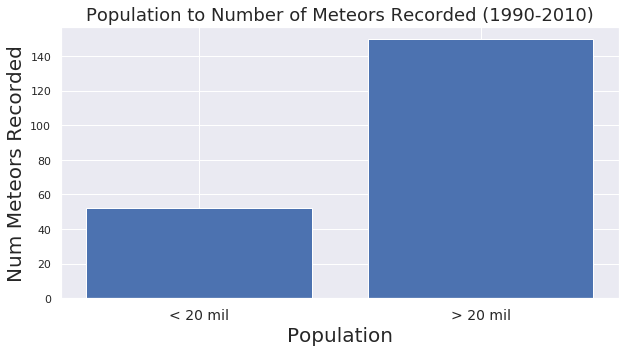

In [154]:

sm_mean = np.mean(sm_countries_strikes)
lg_mean = np.mean(large_countries_strikes)

plt.figure(figsize=(10,5))

label_size = 20

plt.bar(("< 20 mil", "> 20 mil"), (sm_mean, lg_mean))
plt.title("Population to Number of Meteors Recorded (1990-2010)", fontsize=18)
plt.xlabel("Population", fontsize=label_size)
plt.ylabel("Num Meteors Recorded", fontsize=label_size)
plt.xticks(fontsize=14)

(-50, 3000)

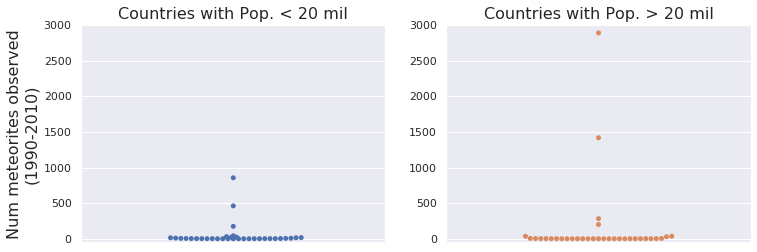

In [151]:
fig = plt.figure(figsize=(12, 4))


title_size = 16
label_size = 16

ax1 = fig.add_subplot(121)
sns.swarmplot(x=sm_countries_strikes,  ax=ax1,orient='v')

ax1.set_title("Countries with Pop. < 20 mil", fontsize=title_size)
ax1.set_ylabel("Num meteorites observed\n(1990-2010)", fontsize=label_size)
ax1.set_ylim(-50,3000)

ax2 = fig.add_subplot(122)
sns.swarmplot(x=large_countries_strikes, ax=ax2, orient='v', color="#D98B5F")

ax2.set_title("Countries with Pop. > 20 mil", fontsize=title_size)
# ax2.set_ylabel("Num meteorites observed", fontsize=label_size)
ax2.set_ylim(-50,3000)